Percentage of Point Loss Explained by Top 5 SHAP Values:
Linear Regression: 20.12%
Random Forest: 46.52%
XGBoost: 93.11%


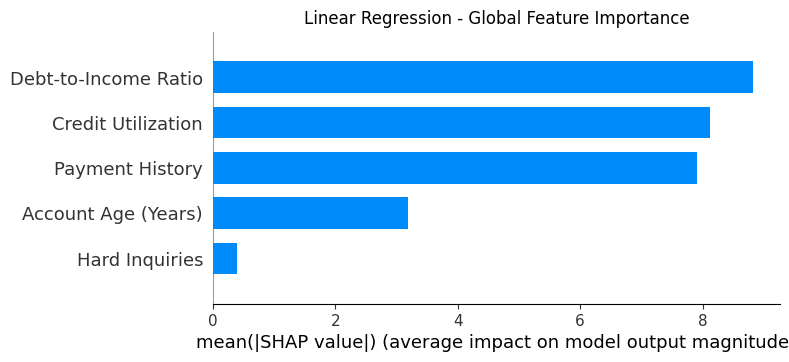

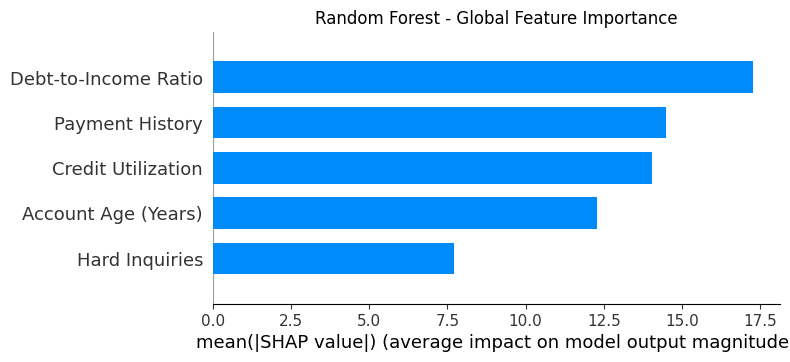

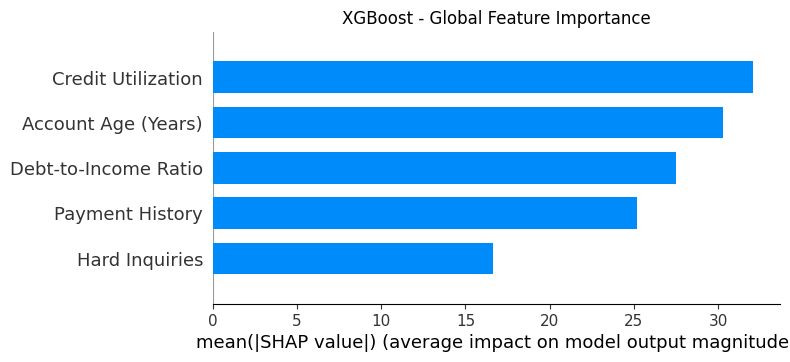

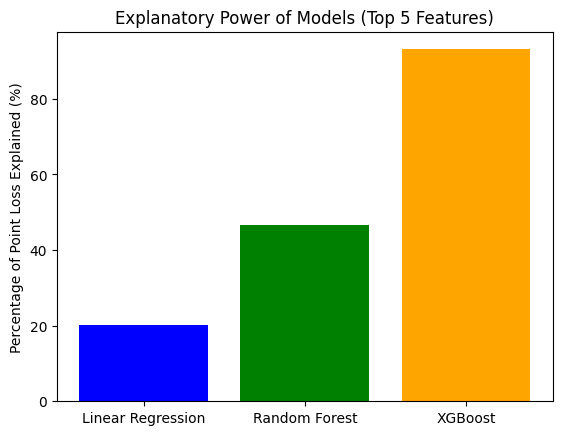

In [1]:

# Project: Using SHAP to Choose the Best Explanatory Model for Credit Score

import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error
import shap
import matplotlib.pyplot as plt

# Step 1: Generate Synthetic Dataset
np.random.seed(42)
n_samples = 1000

data = {
    "Credit Utilization": np.random.uniform(0, 1, n_samples),  # Fraction of credit used
    "Payment History": np.random.uniform(0.7, 1, n_samples),  # Fraction of on-time payments
    "Debt-to-Income Ratio": np.random.uniform(0, 1, n_samples),
    "Account Age (Years)": np.random.uniform(1, 30, n_samples),
    "Hard Inquiries": np.random.randint(0, 10, n_samples),  # Number of hard inquiries
    "Credit Score": np.random.uniform(300, 850, n_samples),  # Target: Credit score
}

df = pd.DataFrame(data)

# Step 2: Define Features and Target
X = df.drop("Credit Score", axis=1)
y = df["Credit Score"]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 3: Train Models
linear_model = LinearRegression().fit(X_train, y_train)
rf_model = RandomForestRegressor(n_estimators=100, random_state=42).fit(X_train, y_train)
xgb_model = XGBRegressor(n_estimators=100, random_state=42).fit(X_train, y_train)

# Step 4: SHAP Analysis
# Linear Regression
explainer_linear = shap.Explainer(linear_model, X_train)
shap_values_linear = explainer_linear(X_test)

# Random Forest
explainer_rf = shap.TreeExplainer(rf_model)
shap_values_rf = explainer_rf.shap_values(X_test)

# XGBoost
explainer_xgb = shap.TreeExplainer(xgb_model)
shap_values_xgb = explainer_xgb.shap_values(X_test)

# Step 5: Percentage of Point Loss Explained by Top 5 Features
def calculate_point_loss_percentage(shap_values, actual_values, top_n=5):
    """
    Calculate the percentage of the credit score point loss explained by the top N SHAP values.
    """
    total_point_loss = abs(actual_values - actual_values.mean()).sum()
    explained_by_top_n = np.abs(shap_values[:,:top_n]).sum(axis=1).sum()
    return (explained_by_top_n / total_point_loss) * 100

linear_pct = calculate_point_loss_percentage(shap_values_linear.values, y_test.values)
rf_pct = calculate_point_loss_percentage(shap_values_rf, y_test.values)
xgb_pct = calculate_point_loss_percentage(shap_values_xgb, y_test.values)

# Print Results
print(f"Percentage of Point Loss Explained by Top 5 SHAP Values:")
print(f"Linear Regression: {linear_pct:.2f}%")
print(f"Random Forest: {rf_pct:.2f}%")
print(f"XGBoost: {xgb_pct:.2f}%")

# Step 6: Visualization
# Global Feature Importance
shap.summary_plot(shap_values_linear, X_test, plot_type="bar", show=False)
plt.title("Linear Regression - Global Feature Importance")
plt.show()

shap.summary_plot(shap_values_rf, X_test, plot_type="bar", show=False)
plt.title("Random Forest - Global Feature Importance")
plt.show()

shap.summary_plot(shap_values_xgb, X_test, plot_type="bar", show=False)
plt.title("XGBoost - Global Feature Importance")
plt.show()

# Bar Plot of Point Loss Explained
models = ["Linear Regression", "Random Forest", "XGBoost"]
explained_percentages = [linear_pct, rf_pct, xgb_pct]

plt.bar(models, explained_percentages, color=['blue', 'green', 'orange'])
plt.ylabel("Percentage of Point Loss Explained (%)")
plt.title("Explanatory Power of Models (Top 5 Features)")
plt.show()
